In [0]:
import pandas as pd
import numpy as np
import urllib.request
from datetime import datetime
import matplotlib.pyplot as plt

In [0]:
for month in range(1,13):
    urllib.request.urlretrieve("https://s3.amazonaws.com/nyc-tlc/trip+data/"+ \
                               "yellow_tripdata_2019-{0:0=2d}.csv".format(month), 
                               "nyc.2019-{0:0=2d}.csv".format(month))

In [0]:
#Just Q1 and Q2 from 2019 yellowcab to reduce RAM usage
Q1Q2yellowcab = pd.read_csv("nyc.2019-01.csv")
Q1Q2yellowcab = Q1Q2yellowcab.append([pd.read_csv("nyc.2019-02.csv"),pd.read_csv("nyc.2019-03.csv"),pd.read_csv("nyc.2019-04.csv")
,pd.read_csv("nyc.2019-05.csv"),pd.read_csv("nyc.2019-06.csv")] )

In [5]:
totalagg = Q1Q2yellowcab.groupby(["PULocationID"])["total_amount"].sum()
totalagg = totalagg.sort_values(axis=0, ascending = False)
print('The three pickup locations with the highest total charges are ' + str(totalagg.index[1]) + ' ' + str(totalagg.index[2]) + " " + str(totalagg.index[3]))

The three pickup locations with the highest total charges are 138 161 230


In [6]:
tripagg = Q1Q2yellowcab.groupby(["PULocationID"])["tpep_pickup_datetime"].count()
tripagg = tripagg.sort_values(axis=0, ascending = False)
print('The three pickup locations with the highest total trips are ' + str(totalagg.index[1]) + ' ' +
      str(totalagg.index[2]) + " " + str(totalagg.index[3]))

The three pickup locations with the highest total trips are 138 161 230


In [0]:
print('The average trip distance is ' + str(Q1Q2yellowcab['trip_distance'].mean()) + ' miles')

The average trip distance is 2.8010838491708046 miles


In [0]:
Q1Q2yellowcab.tpep_pickup_datetime[1].time()

datetime.time(0, 59, 47)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,N,263,4,1,18.0,0.5,0.5,3.86,0.0,0.3,23.16,0.0
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [0]:
Q1Q2yellowcab['tpep_pickup_datetime'] = pd.to_datetime(Q1Q2yellowcab['tpep_pickup_datetime'])
Q1Q2yellowcab['tpep_dropoff_datetime'] = pd.to_datetime(Q1Q2yellowcab['tpep_dropoff_datetime'])

In [0]:
Q1Q2yellowcab['triptime(min)'] = ((Q1Q2yellowcab['tpep_dropoff_datetime'] - Q1Q2yellowcab['tpep_pickup_datetime'])).dt.seconds/60



In [9]:
print('The average trip time is ' + str(Q1Q2yellowcab['triptime(min)'].mean()) + ' minutes')

The average trip time is 17.71576354332651 minutes


In [0]:
Q1Q2yellowcab['month'] = Q1Q2yellowcab.tpep_dropoff_datetime.dt.month

In [50]:
monthlyagg = Q1Q2yellowcab.groupby(["month"])["tpep_pickup_datetime"].count()
monthlyagg.iloc[0:6]

month
1    7664883
2    7018870
3    7834050
4    7432562
5    7563790
6    6942428
Name: tpep_pickup_datetime, dtype: int64

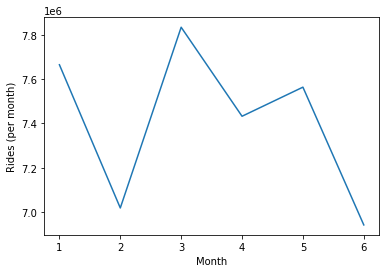

In [52]:
plt.plot(monthlyagg.iloc[0:6].index, monthlyagg.iloc[0:6].values)
plt.xlabel('Month')
plt.ylabel('Rides (per month)')
plt.show()

In [0]:
Q1Q2yellowcab['PUhour'] = Q1Q2yellowcab.tpep_pickup_datetime.dt.hour

In [0]:
houragg = Q1Q2yellowcab.groupby(["PUhour"])["tpep_pickup_datetime"].count()

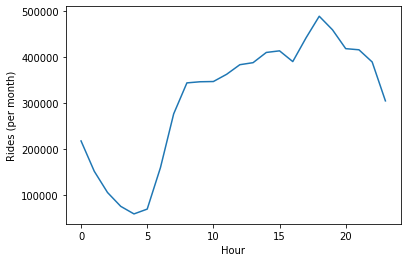

In [53]:
plt.plot(houragg.index, houragg.values/6)
plt.xlabel('Hour')
plt.ylabel('Rides (per month)')
plt.show()

In [0]:
monthlydistanceagg = Q1Q2yellowcab.groupby(["month"])["trip_distance"].mean()


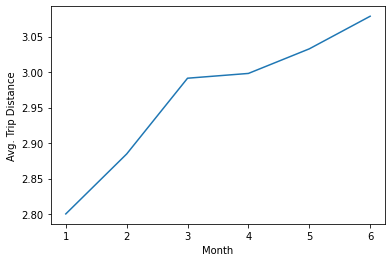

In [55]:
plt.plot(monthlydistanceagg.iloc[0:6].index, monthlydistanceagg.iloc[0:6].values)
plt.xlabel('Month')
plt.ylabel('Avg. Trip Distance')
plt.show()

In [0]:
hourdistanceagg = Q1Q2yellowcab.groupby(["PUhour"])["trip_distance"].mean()

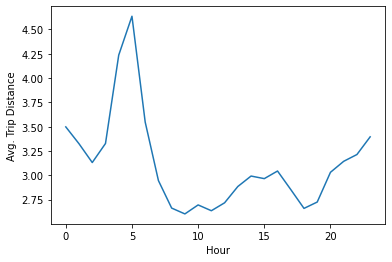

In [57]:
plt.plot(hourdistanceagg.index, hourdistanceagg.values)
plt.xlabel('Hour')
plt.ylabel('Avg. Trip Distance')
plt.show()

In [58]:
Q1Q2yellowcab.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,triptime(min),month,PUhour
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,6.666667,1,0
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,19.200000,1,0
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,4.166667,12,13
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,3.333333,11,15
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,1.600000,11,15


In [69]:
taxilocID = pd.read_csv('/content/taxi_zones.csv')
taxilocID.head()

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island


In [81]:
taxilocIDs = taxilocID[['LocationID', 'zone']]
taxilocIDs

,LocationID,zone
0,1,Newark Airport
1,2,Jamaica Bay
2,3,Allerton/Pelham Gardens
3,4,Alphabet City
4,5,Arden Heights
...,...,...
258,256,Williamsburg (South Side)
259,259,Woodlawn/Wakefield
260,260,Woodside
261,261,World Trade Center


In [88]:
tripaggdf = pd.DataFrame(tripagg)
tripaggdf = tripaggdf.rename(columns={'tpep_pickup_datetime': 'ridecount'})
tripaggdf

,ridecount
PULocationID,
237,1910614
161,1822631
236,1758807
162,1606878
186,1543132
...,...
176,24
99,21
204,19


In [89]:
namedzonesagg = tripaggdf.merge(taxilocIDs, left_on='PULocationID', right_on='LocationID')
namedzonesagg.head()

,ridecount,LocationID,zone
0,1910614,237,Upper East Side South
1,1822631,161,Midtown Center
2,1758807,236,Upper East Side North
3,1606878,162,Midtown East
4,1543132,186,Penn Station/Madison Sq West


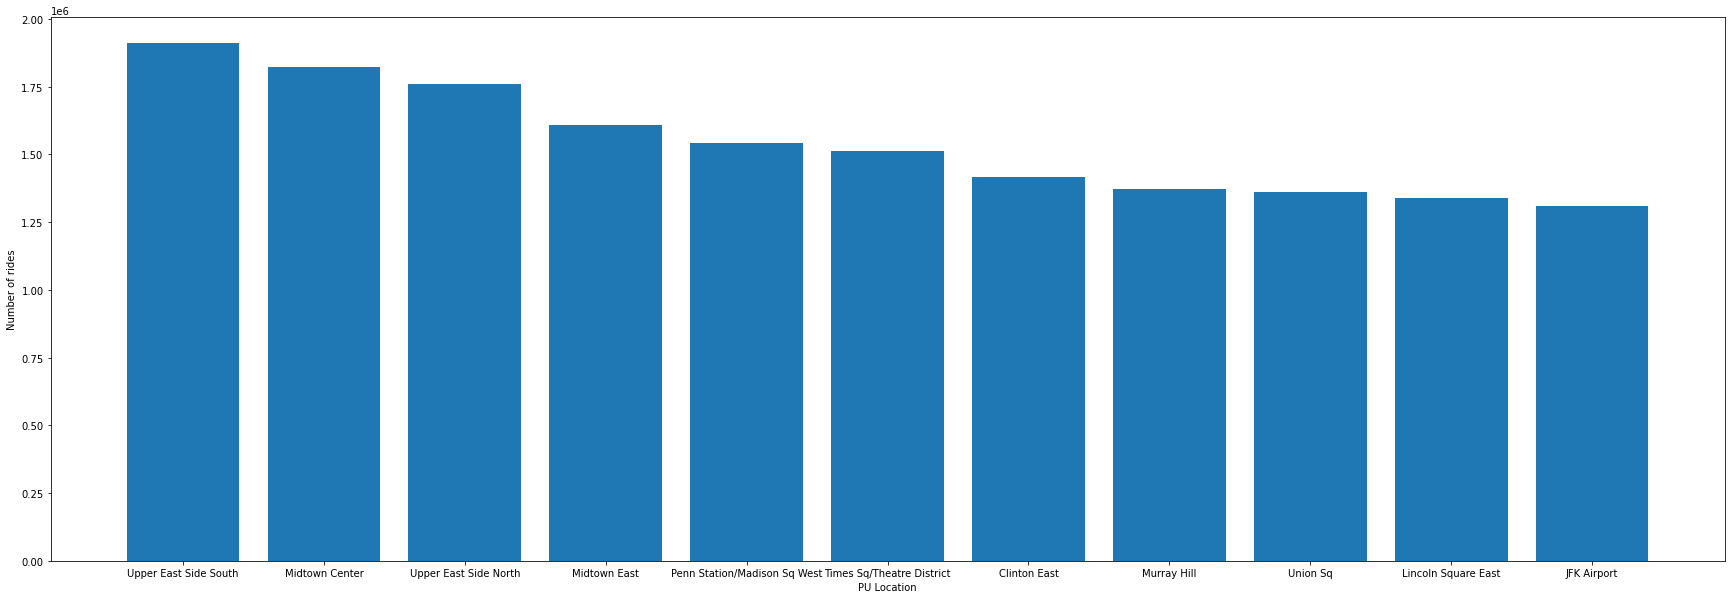

In [98]:
plt.figure(figsize=(30,10))
plt.bar(namedzonesagg['zone'].iloc[0:11], namedzonesagg['ridecount'].iloc[0:11])
plt.xlabel('PU Location')
plt.ylabel('Number of rides')
plt.show()